In [1]:
import os
import sys
import json
import bilby
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import utils
%load_ext autoreload
%autoreload 2

In [2]:
from utils.corner2d_new import (
    Corner2D, CornerZ12, CornerZSpectral, 
    plot_hist2d, plot_square_minus_circle_noedge,
    plot_theories_z12, plot_theories_zspectral, select_by_keys,
    annotate_theories_z12, annotate_theories_zspectral,
    get_lines_for_legend, get_pn_label_from_ppe_index,
)


def plot_z12(
        inj, post_npe, 
        theory_angles, 
        ppe_result_indices=[], ppe_result_cis=[],
        ppe_annotation_indices=[], ppe_annotation_anchors=0.,
        z1_range=0.995, z2_range=0.995,
        npe_color='C0', inj_marker='^',
        fig=None,
        inset=False, zmax_inset=0.1,
        inset_bounds=[0.6,0.05,0.35,0.35],):
    
    cp = CornerZ12(
            fig=fig, 
            grid_indices=theory_angles['b'].values, 
            grid_angles=theory_angles['z_theta'].values)
    cp.plot(post_npe['z_1'].values, post_npe['z_2'].values, 
            x_range=z1_range, y_range=z2_range, color=npe_color)
    cp.add_ppe_results(
            ppe_result_indices, ppe_result_cis, color='C1',
            linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.mark(inj['z_1'], inj['z_2'], color='black',
            marker=inj_marker, linestyle='', markersize=3.*plt.rcParams['lines.markersize'])
    cp.rescale_axes()
    
    cp.add_shade(color='lightgray', zorder=2)
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            ppe_annotation_indices, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    
    if inset:
        axins = cp.axes[2].inset_axes(inset_bounds)
        plot_hist2d(
                post_npe['z_1'].values, post_npe['z_2'].values, 
                x_range=z1_range, y_range=z2_range,
                ax=axins, color='C0')
        plot_theories_z12(
                theory_angles['z_theta'].values, 
                ax=axins, color='gray', linestyle='dotted', zorder=1)
        grid = select_by_keys(cp.grid, ppe_result_indices)
        plot_theories_z12(
                grid.values(), ppe_result_cis, ax=axins, 
                color='C1', linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
        axins.plot(
                inj['z_1'], inj['z_2'], color='black',
                marker=inj_marker, linestyle='', markersize=3.*plt.rcParams['lines.markersize'])
        axins.set_xlim(-zmax_inset, zmax_inset)
        axins.set_ylim(-zmax_inset, zmax_inset)
        axins.set_xticks([-zmax_inset, 0., zmax_inset])
        axins.set_yticks([])
        axins.tick_params(direction='in', labelsize=0.75*plt.rcParams['xtick.labelsize'])
        cp.axes[2].indicate_inset_zoom(axins, edgecolor="black")
    
    return cp


def plot_zspectral(
        inj, post_npe, 
        theory_angles, 
        ppe_result_indices=[], ppe_result_cis=[],
        ppe_annotation_indices=[], ppe_annotation_anchors=0.,
        za_range=0.995, zb_range=0.995,
        npe_color='C0', inj_marker='^',
        fig=None,
        inset=False, zmax_inset=0.1,
        inset_bounds=[0.6,0.05,0.35,0.35],):
    
    cp = CornerZSpectral(
            fig=fig, 
            grid_indices=theory_angles['b'].values, 
            grid_angles=theory_angles['z_ang'].values)
    cp.plot(post_npe['z_ang'].values, post_npe['z_bilat'].values, 
            x_range=za_range, y_range=zb_range, color=npe_color)
    cp.add_ppe_results(
            ppe_result_indices, ppe_result_cis, color='C1',
            linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.mark(inj['z_ang'], inj['z_bilat'], color='black',
            marker=inj_marker, linestyle='', markersize=3.*plt.rcParams['lines.markersize'])
    cp.rescale_axes()
    
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            ppe_annotation_indices, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    cp.axes[2].axhline(0., color='gray', linestyle='dotted')
    cp.axes[3].axhline(0., color='gray', linestyle='dotted')
    
    if inset:
        axins = cp.axes[2].inset_axes(inset_bounds)
        plot_hist2d(
                post_npe['z_ang'].values, post_npe['z_bilat'].values, 
                x_range=za_range, y_range=zb_range,
                ax=axins, color='C0')
        plot_theories_zspectral(
                theory_angles['z_ang'].values, 
                ax=axins, color='gray', linestyle='dotted', zorder=1)
        grid = select_by_keys(cp.grid, ppe_result_indices)
        plot_theories_zspectral(
                grid.values(), ppe_result_cis, ax=axins, 
                color='C1', linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
        axins.plot(
                inj['z_ang'], inj['z_bilat'], color='black',
                marker=inj_marker, linestyle='', markersize=3.*plt.rcParams['lines.markersize'])
        axins.axhline(0., color='gray', linestyle='dotted')
        axins.set_xlim(0., np.pi)
        axins.set_ylim(-zmax_inset, zmax_inset)
        axins.set_yticks([-zmax_inset, 0., zmax_inset])
        axins.set_xticks([])
        axins.tick_params(direction='in', labelsize=0.75*plt.rcParams['xtick.labelsize'])
        cp.axes[2].indicate_inset_zoom(axins, edgecolor="black")
    
    return cp


def plot_masses(
        inj, 
        post_npe,
        mc_range=0.995, q_range=0.995,
        npe_color='C0',
        fig=None):
    
    cp = Corner2D(fig=fig)
    cp.plot(post_npe['chirp_mass'].values, post_npe['mass_ratio'].values, 
            x_range=mc_range, y_range=q_range, color=npe_color)
    cp.mark(inj['chirp_mass'], inj['mass_ratio'], color='black',
            marker='s', markersize=2.*plt.rcParams['lines.markersize'])
    cp.rescale_axes()
    cp.set_ylim(None, 1.)
    cp.align_axes()
    cp.axes[2].set_xlabel(r'$\mathcal{M}\,/\,M_\odot$')
    cp.axes[2].set_ylabel(r'$q$')
    
    return cp


def plot_reconstruction(df, fig=None, ylim=None, 
                        npe_color='C0', 
                        weight_cmap=plt.cm.gray, weight_alpha=1.):
    
    if fig is None:
        fig = plt.figure()
    fig.subplots()
    
    lwfac = 2.
    ax = fig.axes[0]
    ax.plot(df['freqs'], df['phi_npe_map']-df['phi_inj'], 
            color=npe_color, linewidth=lwfac*plt.rcParams['lines.linewidth'],
            label='npE mapping')
    ax.plot(df['freqs'], df['phi_npe_post']-df['phi_inj'], 
            color=npe_color, linestyle='dashed', linewidth=lwfac*plt.rcParams['lines.linewidth'],
            label='npE posterior')
    ax.autoscale(axis='x', tight=True)
    ax.set_ylim(ylim)
    ylim = ax.get_ylim()

    w = df['ampl_over_asd']**2 * df['freqs']
    w = w / np.max(w)
    w = np.vstack([w, w])
    x, y = np.meshgrid(df['freqs'], ylim)
    cax = ax.pcolormesh(x, y, w, vmin=0., vmax=1., cmap=weight_cmap, alpha=weight_alpha)
    cbar = plt.colorbar(cax, ax=ax, fraction=0.1, pad=0.03, label='SNR weight')
    
#     ax.grid()
    ax.set_xscale('log')
    ax.set_xlabel(r'$f\,/\,\mathrm{Hz}$')
    ax.set_ylabel(r'$\Phi-\Phi_\mathrm{inj}$')
    ax.axhline(0., color='black')
    ax.legend()
    
    return fig

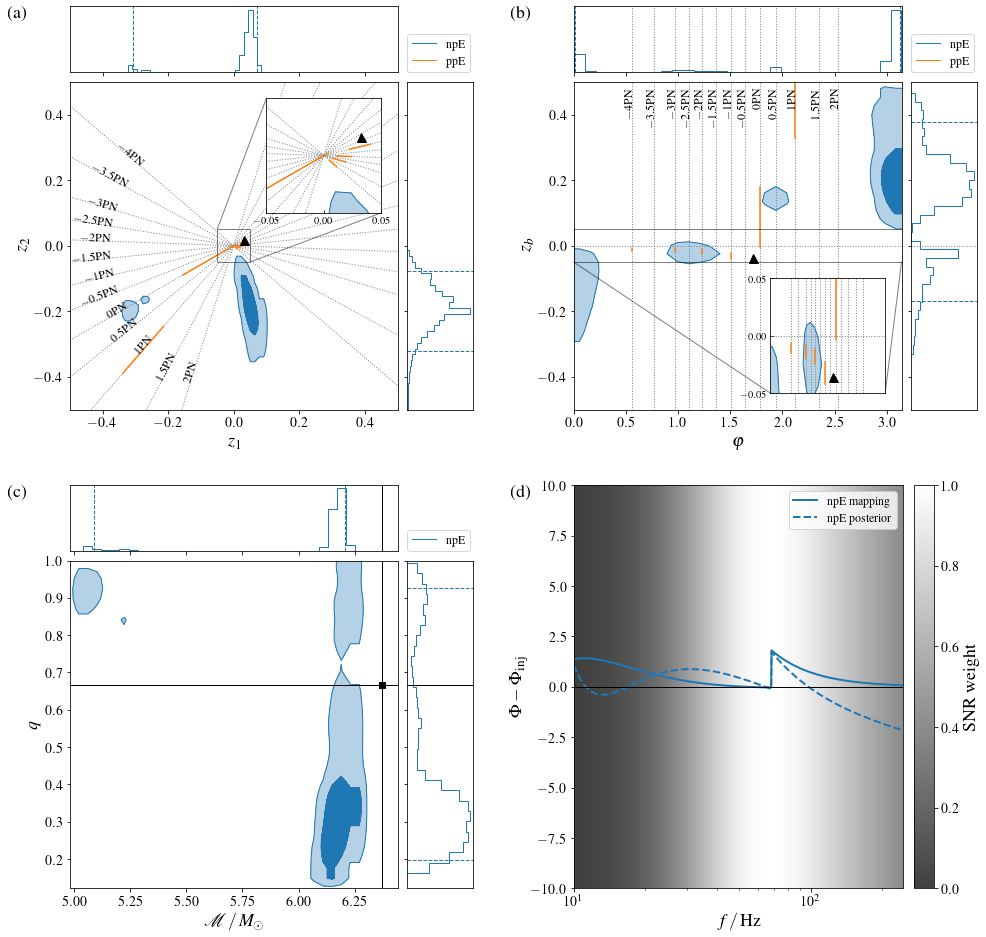

In [3]:
plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE*2,
        utils.TEXT_WIDTH_PRD_DOUBLE*2))
subfigs = fig.subfigures(2, 2)

labels = ['npE', 'ppE']
lines = get_lines_for_legend(colors=['C0', 'C1'])
# labels_extra = ['full theory', 'leading effect']
# lines_extra = get_lines_for_legend(colors=['black', 'black'], markers=['^', 'v'])

root_posteriors = "../data/bilby_results/posteriors/"
root_injections = "../data/bilby_results/injections/"
theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
phase_recon = pd.read_csv("../data/phase_reconstruction_darkphoton_alpha5en2_gamma2en2_lam1p4e3.csv", index_col=0)

run_name = "mtot15_darkphoton_alpha5en2_gamma2en2_lam1p4e3"
with open(os.path.join(root_injections, run_name+"_z12.json"), 'r') as f:
    inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
    
ppe_result_indices = [-13, -11, -9, -7, -5, -3, -1]
ppe_result_cis = []
for b in ppe_result_indices:
    post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+f"_bn{-b}.csv"), index_col=0)
    ppe_result_cis.append(np.quantile(post_ppe['z_bilat'], [0.05,0.95]))
    
post_npe_z12 = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
post_npe_zpolar = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)

cp = plot_z12(
        inj, post_npe_z12,
        theory_angles=theory_angles, 
        ppe_result_indices=ppe_result_indices,
        ppe_result_cis=ppe_result_cis,
        ppe_annotation_indices=[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1], 
        ppe_annotation_anchors=0.375,
        fig=subfigs[0,0], 
        inset=True, zmax_inset=0.05,
        inset_bounds=[0.6,0.6,0.35,0.35])
cp.set_xlim(-0.5, 0.5)
cp.set_ylim(-0.5, 0.5)
cp.align_axes()
# cp.axes[2].legend(lines, labels, loc='lower left')
cp.axes[1].legend(lines, labels, loc=(0,0))

cp = plot_zspectral(
        inj, post_npe_zpolar,
        theory_angles=theory_angles,
        ppe_result_indices=ppe_result_indices,
        ppe_result_cis=ppe_result_cis,
        ppe_annotation_indices=[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1], 
        ppe_annotation_anchors=0.48,
        fig=subfigs[0,1],
        inset=True, zmax_inset=0.05,
        inset_bounds=[0.6,0.05,0.35,0.35])
cp.set_xlim(0, np.pi)
cp.set_ylim(-0.5, 0.5)
cp.align_axes()
# cp.axes[2].legend(lines, labels, loc='lower right')
cp.axes[1].legend(lines, labels, loc=(0,0))

cp = plot_masses(
        inj, 
        post_npe_z12, 
#         mc_range_npe=0.99,
        fig=subfigs[1,0])
# cp.axes[2].legend(lines, labels, loc='lower left')
cp.axes[1].legend(lines[:1], labels[:1], loc=(0,0))

sf = subfigs[1,1]
plot_reconstruction(phase_recon, ylim=(-10.,10.), weight_alpha=0.75, fig=sf)
# ax, cbar = sf.axes

subfigs[0, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[0, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[1, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
subfigs[1, 1].subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=0.95)

axes_to_label = [sf.axes[0] for sf in subfigs.flat]
axes_label_pos = [(-0.13,1.)] * len(axes_to_label)
for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
    axlabel = f'({chr(97+i)})'
    ax.text(pos[0], pos[1], axlabel, 
            transform=ax.transAxes, 
            fontweight='bold', fontsize=18,
            va='top', ha='right')
    
# fig.savefig('../figs/darkphoton_dipole.pdf')

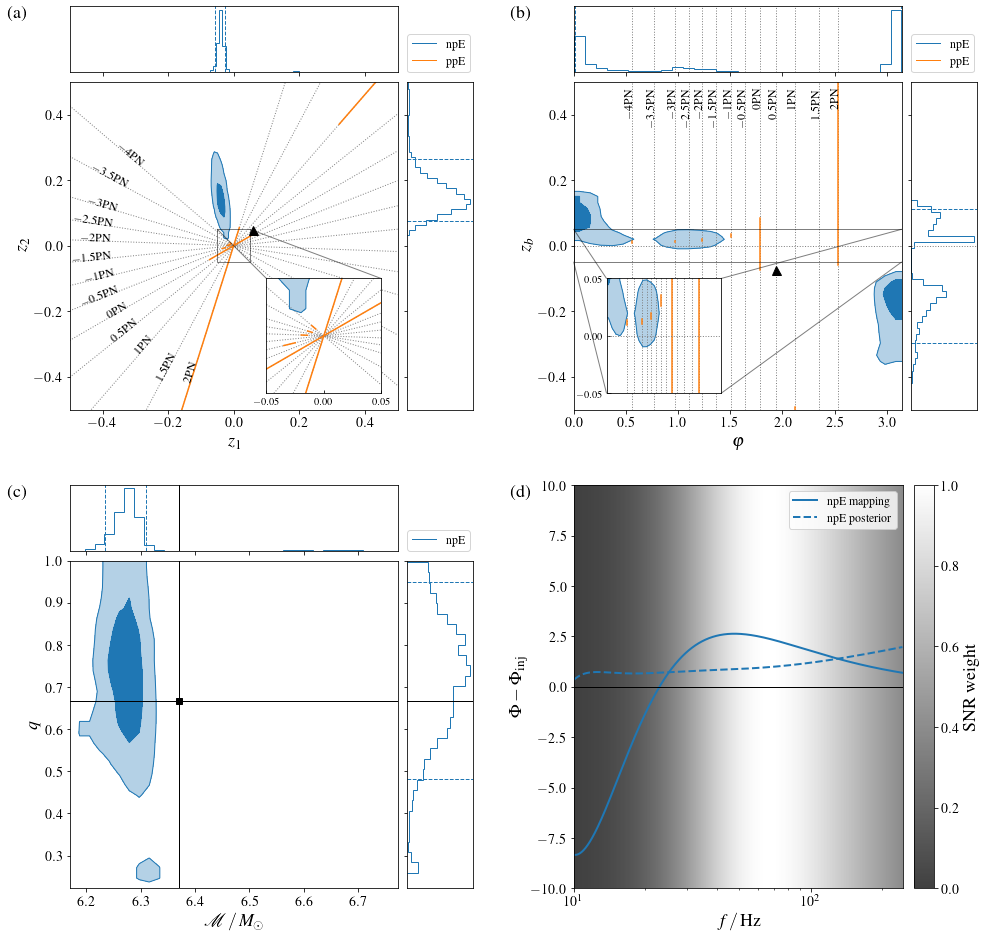

In [5]:
plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE*2,
        utils.TEXT_WIDTH_PRD_DOUBLE*2))
subfigs = fig.subfigures(2, 2)

labels = ['npE', 'ppE']
lines = get_lines_for_legend(colors=['C0', 'C1'])
# labels_extra = ['full theory', 'leading effect']
# lines_extra = get_lines_for_legend(colors=['black', 'black'], markers=['^', 'v'])

root_posteriors = "../data/bilby_results/posteriors/"
root_injections = "../data/bilby_results/injections/"
theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
phase_recon = pd.read_csv("../data/phase_reconstruction_darkphoton_alpha5en2_gamma2en2_lam3e2.csv", index_col=0)

run_name = "mtot15_darkphoton_alpha5en2_gamma2en2_lam3e2"
with open(os.path.join(root_injections, run_name+"_z12.json"), 'r') as f:
    inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
    
ppe_result_indices = [-13, -11, -9, -7, -5, -3, -1]
ppe_result_cis = []
for b in ppe_result_indices:
    post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+f"_bn{-b}.csv"), index_col=0)
    ppe_result_cis.append(np.quantile(post_ppe['z_bilat'], [0.05,0.95]))
    
post_npe_z12 = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
post_npe_zpolar = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)
    
cp = plot_z12(
        inj, post_npe_z12,
        theory_angles=theory_angles, 
        ppe_result_indices=ppe_result_indices,
        ppe_result_cis=ppe_result_cis,
        ppe_annotation_indices=[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1], 
        ppe_annotation_anchors=0.375,
        fig=subfigs[0,0], 
        inset=True, zmax_inset=0.05,
        inset_bounds=[0.6,0.05,0.35,0.35])
cp.set_xlim(-0.5, 0.5)
cp.set_ylim(-0.5, 0.5)
cp.align_axes()
# cp.axes[2].legend(lines, labels, loc='lower left')
cp.axes[1].legend(lines, labels, loc=(0,0))

cp = plot_zspectral(
        inj, post_npe_zpolar,
        theory_angles=theory_angles,
        ppe_result_indices=ppe_result_indices,
        ppe_result_cis=ppe_result_cis,
        ppe_annotation_indices=[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1], 
        ppe_annotation_anchors=0.48,
        fig=subfigs[0,1],
        inset=True, zmax_inset=0.05,
        inset_bounds=[0.1,0.05,0.35,0.35])
cp.set_xlim(0, np.pi)
cp.set_ylim(-0.5, 0.5)
cp.align_axes()
# cp.axes[2].legend(lines, labels, loc='lower right')
cp.axes[1].legend(lines, labels, loc=(0,0))

cp = plot_masses(
        inj, 
        post_npe_z12, 
#         mc_range_npe=0.99,
        fig=subfigs[1,0])
# cp.axes[2].legend(lines, labels, loc='upper right')
cp.axes[1].legend(lines[:1], labels[:1], loc=(0,0))

sf = subfigs[1,1]
plot_reconstruction(phase_recon, ylim=(-10.,10.), weight_alpha=0.75, fig=sf)
# ax, cbar = sf.axes

subfigs[0, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[0, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[1, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
subfigs[1, 1].subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=0.95)

axes_to_label = [sf.axes[0] for sf in subfigs.flat]
axes_label_pos = [(-0.13,1.)] * len(axes_to_label)
for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
    axlabel = f'({chr(97+i)})'
    ax.text(pos[0], pos[1], axlabel, 
            transform=ax.transAxes, 
            fontweight='bold', fontsize=18,
            va='top', ha='right')
    
# fig.savefig('../figs/darkphoton_f3.pdf')

## Presentation

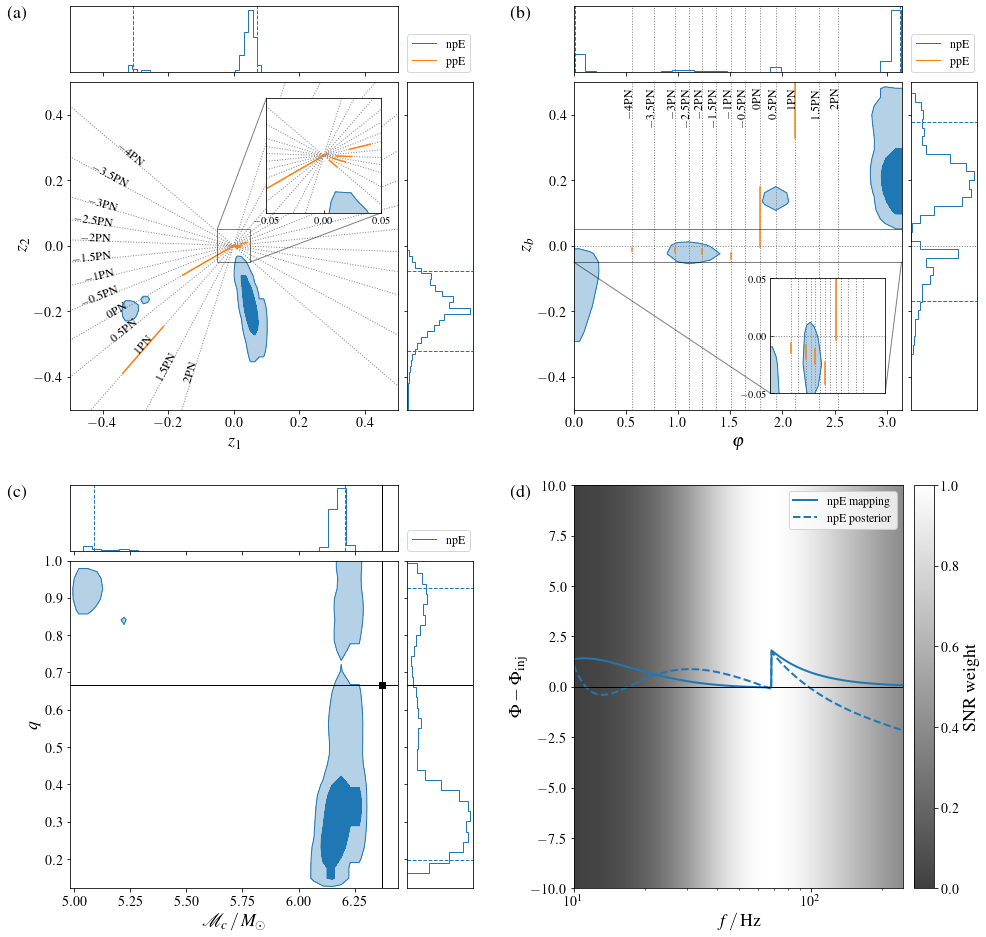

In [6]:
# plt.style.use('publication.mplstyle')
# fig = plt.figure(figsize=(
#         utils.TEXT_WIDTH_PRD_DOUBLE*2,
#         utils.TEXT_WIDTH_PRD_DOUBLE*2))
# subfigs = fig.subfigures(2, 2)

# labels = ['npE', 'ppE']
# lines = get_lines_for_legend(colors=['C0', 'C1'])
# # labels_extra = ['full theory', 'leading effect']
# # lines_extra = get_lines_for_legend(colors=['black', 'black'], markers=['^', 'v'])

# root_posteriors = "../data/bilby_results/posteriors/"
# root_injections = "../data/bilby_results/injections/"
# theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
# phase_recon = pd.read_csv("../data/phase_reconstruction_darkphoton_alpha5en2_gamma2en2_lam1p4e3.csv", index_col=0)

# run_name = "mtot15_darkphoton_alpha5en2_gamma2en2_lam1p4e3"
# with open(os.path.join(root_injections, run_name+"_z12.json"), 'r') as f:
#     inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
    
# ppe_result_indices = [-13, -11, -9, -7, -5, -3, -1]
# ppe_result_cis = []
# for b in ppe_result_indices:
#     post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+f"_bn{-b}.csv"), index_col=0)
#     ppe_result_cis.append(np.quantile(post_ppe['z_bilat'], [0.05,0.95]))
    
# post_npe_z12 = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
# post_npe_zpolar = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)

# cp = plot_z12(
#         inj, post_npe_z12,
#         theory_angles=theory_angles, 
#         ppe_result_indices=ppe_result_indices,
#         ppe_result_cis=ppe_result_cis,
#         ppe_annotation_indices=[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1], 
#         ppe_annotation_anchors=0.375, 
#         inj_marker='',
#         fig=subfigs[0,0], 
#         inset=True, zmax_inset=0.05,
#         inset_bounds=[0.6,0.6,0.35,0.35])
# cp.set_xlim(-0.5, 0.5)
# cp.set_ylim(-0.5, 0.5)
# cp.align_axes()
# # cp.axes[2].legend(lines, labels, loc='lower left')
# cp.axes[1].legend(lines, labels, loc=(0,0))

# cp = plot_zspectral(
#         inj, post_npe_zpolar,
#         theory_angles=theory_angles,
#         ppe_result_indices=ppe_result_indices,
#         ppe_result_cis=ppe_result_cis,
#         ppe_annotation_indices=[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1], 
#         ppe_annotation_anchors=0.48,
#         inj_marker='',
#         fig=subfigs[0,1],
#         inset=True, zmax_inset=0.05,
#         inset_bounds=[0.6,0.05,0.35,0.35])
# cp.set_xlim(0, np.pi)
# cp.set_ylim(-0.5, 0.5)
# cp.align_axes()
# # cp.axes[2].legend(lines, labels, loc='lower right')
# cp.axes[1].legend(lines, labels, loc=(0,0))

# cp = plot_masses(
#         inj, 
#         post_npe_z12, 
# #         mc_range_npe=0.99,
#         fig=subfigs[1,0])
# # cp.axes[2].legend(lines, labels, loc='lower left')
# cp.axes[1].legend(lines[:1], labels[:1], loc=(0,0))

# sf = subfigs[1,1]
# plot_reconstruction(phase_recon, ylim=(-10.,10.), weight_alpha=0.75, fig=sf)
# # ax, cbar = sf.axes

# subfigs[0, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
# subfigs[0, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
# subfigs[1, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
# subfigs[1, 1].subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=0.95)

# axes_to_label = [sf.axes[0] for sf in subfigs.flat]
# axes_label_pos = [(-0.13,1.)] * len(axes_to_label)
# for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
#     axlabel = f'({chr(97+i)})'
#     ax.text(pos[0], pos[1], axlabel, 
#             transform=ax.transAxes, 
#             fontweight='bold', fontsize=18,
#             va='top', ha='right')
    
# # fig.savefig('../figs/darkphoton_dipole_nomarker.pdf')

In [15]:
from utils.corner2d_new import Corner2D, CornerZ12, CornerZSpectral, get_lines_for_legend, plot_hist

def plot_z12_for_slides(
        inj, post_npe, 
        theory_angles, 
        ppe_annotation_indices=[], ppe_annotation_anchors=0.,
        z1_range=0.995, z2_range=0.995,
        npe_color='C0', inj_marker='^',
        fig=None,):
    
    cp = CornerZ12(
            fig=fig, 
            grid_indices=theory_angles['b'].values, 
            grid_angles=theory_angles['z_theta'].values)
    cp.plot(post_npe['z_1'].values, post_npe['z_2'].values, 
            x_range=z1_range, y_range=z2_range, color=npe_color)
    cp.rescale_axes()
    
    cp.add_shade(color='lightgray', zorder=2)
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            ppe_annotation_indices, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    
    return cp


def plot_masses_for_slides(
        inj, 
        post_npe,
        mc_range=0.995, q_range=0.995,
        npe_color='C0',
        fig=None):
    
    cp = Corner2D(fig=fig)
    cp.plot(post_npe['chirp_mass'].values, post_npe['mass_ratio'].values, 
            x_range=mc_range, y_range=q_range, color=npe_color)
    cp.mark(inj['chirp_mass'], inj['mass_ratio'], color='black',
            marker='s', markersize=2.*plt.rcParams['lines.markersize'])
    cp.rescale_axes()
    cp.set_ylim(None, 1.)
    cp.align_axes()
    cp.axes[2].set_xlabel(r'$\mathcal{M}\,/\,M_\odot$')
    cp.axes[2].set_ylabel(r'$q$')
    
    return cp

In [3]:
root_posteriors = "../data/bilby_results/posteriors/"
root_injections = "../data/bilby_results/injections/"
theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
phase_recon = pd.read_csv("../data/phase_reconstruction_darkphoton_alpha5en2_gamma2en2_lam1p4e3.csv", index_col=0)

run_name = "mtot15_darkphoton_alpha5en2_gamma2en2_lam1p4e3"
with open(os.path.join(root_injections, run_name+"_z12.json"), 'r') as f:
    inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
    
ppe_result_indices = [-13, -11, -9, -7, -5, -3, -1]
ppe_result_cis = []
for b in ppe_result_indices:
    post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+f"_bn{-b}.csv"), index_col=0)
    ppe_result_cis.append(np.quantile(post_ppe['z_bilat'], [0.05,0.95]))
    
post_npe_z12 = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
post_npe_zpolar = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)

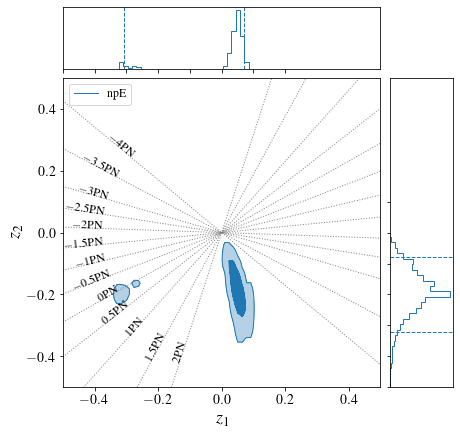

In [18]:
plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE))

labels = ['npE']
lines = get_lines_for_legend(colors=['C0'])
cp = plot_z12_for_slides(
        inj, post_npe_z12, 
        z1_range=0.995, z2_range=0.995,
        theory_angles=theory_angles,
        ppe_annotation_indices=[-13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1], 
        ppe_annotation_anchors=0.375,
        fig=fig)
cp.axes[2].legend(lines, labels, loc='upper left')
cp.set_xlim(-0.5,0.5)
cp.set_ylim(-0.5,0.5)

fig.savefig('../figs/slides/darkphoton_dipole_z12.pdf')

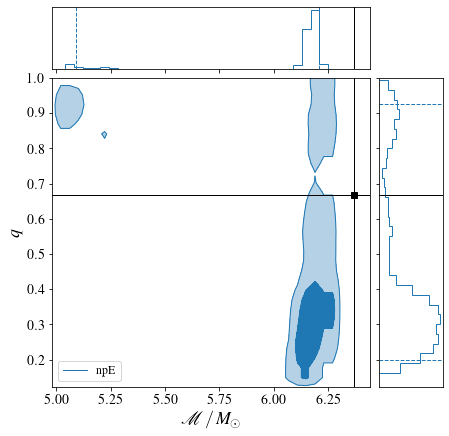

In [19]:
plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE))

labels = ['npE']
lines = get_lines_for_legend(colors=['C0'])
cp = plot_masses_for_slides(
        inj, 
        post_npe_z12, 
#         mc_range_npe=0.99,
        fig=fig)
cp.axes[2].legend(lines, labels, loc='lower left')

fig.savefig('../figs/slides/darkphoton_dipole_masses.pdf')